In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl


In [12]:
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

In [31]:
X = []  # 定义图像名称
Y = []  # 定义图像分类类标
Z = []  # 定义图像像素

for f in os.listdir("airplane"):
    # 获取图像名称
    X.append("airplane//"+ str(f))
        # 获取图像类标即为文件夹名称
    Y.append(0)

for f in os.listdir("forest"):
    # 获取图像名称
    X.append("forest//"+ str(f))
        # 获取图像类标即为文件夹名称
    Y.append(1)

In [32]:
X = np.array(X)
Y = np.array(Y)

In [33]:
# 随机率为100% 选取其中的20%作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=1)

print(len(X_train), len(X_test), len(y_train), len(y_test))

160 40 160 40


In [34]:
# 训练集
XX_train = []
for i in X_train:
    # 读取图像
    # print i
    image = cv2.imdecode(np.fromfile(i, dtype=np.uint8), cv2.IMREAD_COLOR)

    # 图像像素大小一致
    img = cv2.resize(image, (256, 256),
                     interpolation=cv2.INTER_CUBIC)

    # 计算图像直方图并存储至X数组
    hist = cv2.calcHist([img], [0, 1], None,
                        [256, 256], [0.0, 255.0, 0.0, 255.0])

    XX_train.append(((hist / 255).flatten()))

In [35]:
# 测试集
XX_test = []
for i in X_test:
    # 读取图像
    # print i
    # 不使用imread，而是用imdecode以识别中文路径
    image = cv2.imdecode(np.fromfile(i, dtype=np.uint8), cv2.IMREAD_COLOR)

    # 图像像素大小一致
    img = cv2.resize(image, (256, 256),
                     interpolation=cv2.INTER_CUBIC)

    # 计算图像直方图并存储至X数组
    hist = cv2.calcHist([img], [0, 1], None,
                        [256, 256], [0.0, 255.0, 0.0, 255.0])

    XX_test.append(((hist / 255).flatten()))

In [36]:
# 常见核函数‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
clf = SVC().fit(XX_train, y_train)
clf = SVC(kernel="linear").fit(XX_train, y_train)
predictions_labels = clf.predict(XX_test)

In [37]:
print(u'预测结果:')
print(predictions_labels)
print(u'算法评价:')
print(classification_report(y_test, predictions_labels))

预测结果:
[0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1]
算法评价:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.81      1.00      0.89        17

    accuracy                           0.90        40
   macro avg       0.90      0.91      0.90        40
weighted avg       0.92      0.90      0.90        40



In [41]:
clf

SVC(kernel='linear')

In [43]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [44]:
# 计算性能指标
accuracy = accuracy_score(y_test, predictions_labels)
recall = recall_score(y_test, predictions_labels)


In [53]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9000
Recall: 1.0000


C:\Users\18094\AppData\Local\Temp\ipykernel_18568\264473639.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\18094\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


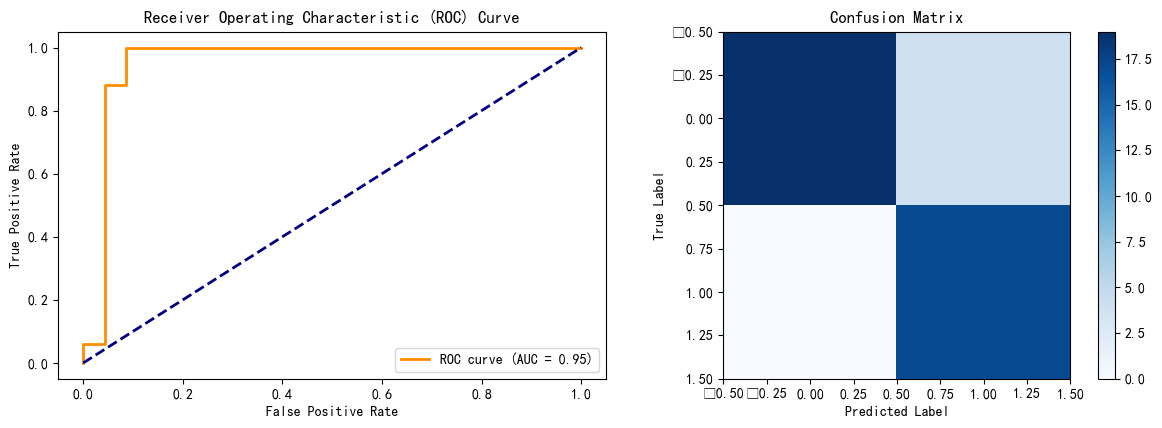

In [51]:
# 计算ROC曲线
y_score = clf.decision_function(XX_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions_labels)

# 可视化展示
plt.figure(figsize=(12, 8))

# ROC曲线
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 混淆矩阵
plt.subplot(2, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
